In [3]:
import sqlite3
import matplotlib.pyplot as plt
import numpy


def read_gps_data_from_db(filename):
    connection = sqlite3.connect(filename)
    cursor = connection.cursor()
    
    cursor.execute("SELECT message, timestamp FROM log_table WHERE category = 'Location Update' LIMIT 120")
    
    return list(cursor)

data = read_gps_data_from_db("speed_data")

In [4]:
acc_a = []
speed_a = []
tst_a = []

for msg in data:
    d = msg[0]
    tst = msg[1]
    
    accuracy = float(d.split(";")[2])
    speed = float(d.split(";")[4]) * 3.6
    
    acc_a.append(accuracy)
    speed_a.append(speed)
    tst_a.append(int(tst))
    
    
# Make time begin at 0
min_tst = min(tst_a)
tst_a = [t - min_tst for t in tst_a]

# Moving average
avg_acc = numpy.convolve(acc_a, numpy.ones(int(3))/float(3), 'same')
avg_speed = numpy.convolve(speed_a, numpy.ones(int(2))/float(2), 'same')

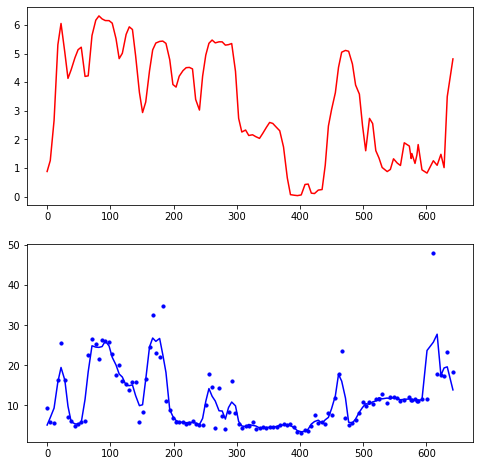

In [5]:
_, ax = plt.subplots(2, figsize = (8,8))

ax[1].scatter(tst_a, acc_a, zorder=1, c='blue', s=10)
ax[1].plot(tst_a, avg_acc, c='blue')

ax[0].plot(tst_a, avg_speed, c='red')

pass